In [18]:
import pandas as pd
import numpy as np
data=pd.read_excel('cust.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fashion_prod  32 non-null     float64
 1   Savings       32 non-null     float64
dtypes: float64(2)
memory usage: 644.0 bytes


In [19]:
import statsmodels.api as sm
X=sm.add_constant(data['fashion_prod'])
X.head(5)

,const,fashion_prod
0,1.0,9.10
1,1.0,0.23
2,1.0,1.92
3,1.0,18.20
4,1.0,0.10


In [20]:
Y=data['Savings']
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,Y, train_size = 0.8, random_state = 100 )
data_lm=sm.OLS(train_y,train_X).fit()
print(data_lm.params)

const          -7.646148
fashion_prod    0.966135
dtype: float64


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
#model=LinearRegression()
#model.fit(train_X, train_y)
y_pred = data_lm.predict(test_X)

r_squared = r2_score(test_y, y_pred)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.87


In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

Mean Squared Error (MSE): 9.60


In [23]:
p_value = data_lm.pvalues['fashion_prod']
if p_value < 0.1:
    print("The fashion_prod variable is significant.")
else:
    print("The fashion_prod variable is not significant.")

The fashion_prod variable is significant.


In [24]:
leverage_threshold = 1* (len(train_X.columns) + 1) / len(train_X)
influence = data_lm.get_influence()

# finding levarage values
leverage = influence.hat_matrix_diag
leverage_outliers = np.where(leverage >  leverage_threshold)[0]


# Printing outlier values using leverage
print("levarage outliers : \n")
for item in leverage_outliers :
    print("Value is :\n", train_X.iloc[item])
    print("\nLevarage value : ", leverage[item])

levarage outliers : 

Value is :
 const            1.0
fashion_prod    16.1
Name: 25, dtype: float64

Levarage value :  0.19826583894332736
Value is :
 const            1.0
fashion_prod    18.2
Name: 3, dtype: float64

Levarage value :  0.26952238453526645
Value is :
 const            1.0
fashion_prod    17.0
Name: 8, dtype: float64

Levarage value :  0.22718730894484843


<Figure size 800x600 with 0 Axes>

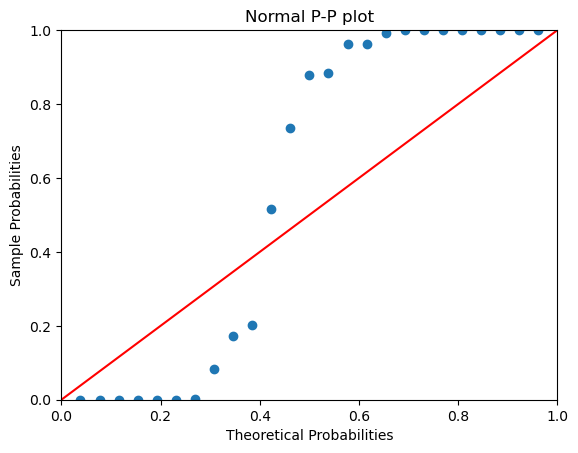

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn
data_resid=data_lm.resid
probplot=sm.ProbPlot(data_resid)
plt.figure(figsize=(8,6))
probplot.ppplot(line='45')
plt.title("Normal P-P plot")
plt.show()

In [26]:
from scipy import stats
from scipy.stats import zscore
# Calculate the Z-scores for the residuals
residuals = test_y - y_pred
z_scores = np.abs(stats.zscore(residuals))
data['z_scores']=zscore(data.Savings)
data[ (data.z_scores > 1.0) | (data.z_scores < -1.0) ]

print("Outliers detected by Z-score method:")
print(z_scores)


Outliers detected by Z-score method:
13    0.661166
28    0.171539
1     0.311050
26    1.366129
5     0.570112
18    1.798265
29    1.005778
dtype: float64
